In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

This Jupyter notebook will be the Machine learning part of the project. We will import the clean data and inspect it again to check which columns will help us build our machine learning model. This will include preprocessing the data, encoding categorical values, scaling numerical ones and using them for clustering using k-means.

## 1.1 Load and inspect the data

In [2]:
# Load the dataset
df = pd.read_csv('../data/cleaned_data/student_social_media_addiction_cleaned.csv')

In [3]:
# Inspect the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   new_student_id                702 non-null    object 
 1   age                           702 non-null    int64  
 2   gender                        702 non-null    object 
 3   relationship_status           702 non-null    object 
 4   academic_level                702 non-null    object 
 5   country                       702 non-null    object 
 6   continents                    702 non-null    object 
 7   most_used_platform            702 non-null    object 
 8   average_daily_usage_minutes   702 non-null    float64
 9   average_daily_use_by_hour     702 non-null    int64  
 10  sleep_per_night_minutes       702 non-null    float64
 11  sleep_hours_per_night         702 non-null    float64
 12  conflicts_over_social_media   702 non-null    int64  
 13  affec

In [4]:
# Check the columns and pick out which ones we will use going forward
df.columns

Index(['new_student_id', 'age', 'gender', 'relationship_status',
       'academic_level', 'country', 'continents', 'most_used_platform',
       'average_daily_usage_minutes', 'average_daily_use_by_hour',
       'sleep_per_night_minutes', 'sleep_hours_per_night',
       'conflicts_over_social_media', 'affects_academic_performance',
       'addicted_score', 'mental_health_score'],
      dtype='object')

We will using the following columns:
- gender  
- relationship_status  
- academic_level  
- continents  
- average_daily_usage_minutes  
- sleep_per_night_minutes  
- conflicts_over_social_media  
- affects_academic_performance  
- addicted_score  
- mental_health_score
- most used platform


In [5]:
# Create a copy of the dataset to be used specifically for machine learning
df_ml = df.copy()

In [6]:
# Drop unnecessary columns
df_ml = df.drop(columns=['new_student_id', 'age', 'country', 'average_daily_use_by_hour', 'sleep_hours_per_night'])

In [7]:
# Check required columns are all there
df_ml.columns

Index(['gender', 'relationship_status', 'academic_level', 'continents',
       'most_used_platform', 'average_daily_usage_minutes',
       'sleep_per_night_minutes', 'conflicts_over_social_media',
       'affects_academic_performance', 'addicted_score',
       'mental_health_score'],
      dtype='object')

## 1.2 Encode categoricals

Although clustering does not require train/test splitting we will split the dataset up that way in line with the method learned in the LMS

In [8]:
# Assign categorical and numeric columns to variables
cat_cols = ['gender', 'relationship_status', 'academic_level', 'continents', 'affects_academic_performance']
num_cols = ['average_daily_usage_minutes', 'sleep_per_night_minutes', 'conflicts_over_social_media',
    'addicted_score', 'mental_health_score'
]

preprocessor = ColumnTransformer([
    ('categorical', OneHotEncoder(drop='first'), cat_cols),
    ('numeric', StandardScaler(), num_cols)
])

In [9]:
# Split the data into train and test data
X_train, X_test = train_test_split(df, test_size=0.2, random_state=42)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (561, 16)
Test shape: (141, 16)


## 1.3 Fit preprocessor and prepare data
We will encode the categorical data and scale it, this is to prevent the larger values from dominating our ml tool. Scaling will transform each numerical feature so that it has a mean of 0 and std of 1 as well as the newly encoded categoricals.

In [10]:
# Fit on train, transform both
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

X_train_prepared.shape

(561, 14)

## 1.4 Determine cluster amount

We will use the elbow method and silhouette scores to work out the optimal number of clear clusters for our dataset. There is an element of trial and error to this but by using both indicators hopefully the most accurate number can be determined.

c:\Users\Steven\Documents\New Job\2025\Data analysis\Code Institute\social_media_addiction\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Steven\Documents\New Job\2025\Data analysis\Code Institute\social_media_addiction\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Steven\Documents\New Job\2025\Data analysis\Code Institute\social_media_addiction\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._che

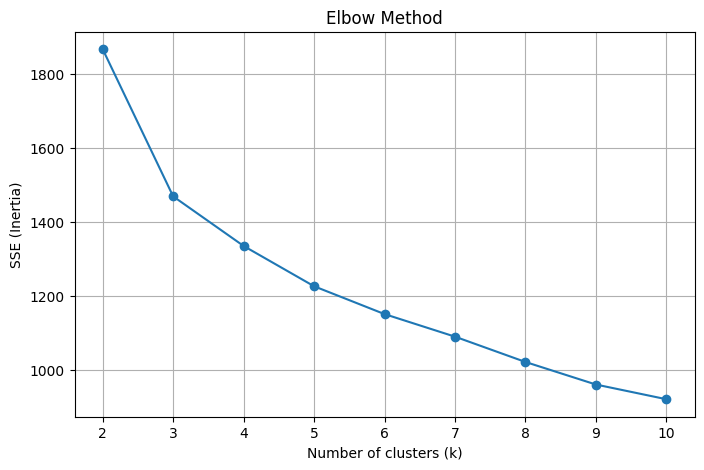

In [ ]:
# Running the elbow method test on dataset

sse = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_prepared)
    sse.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(k_values, sse, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()